In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import AmplitudeEmbedding, AngleEmbedding
import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


import warnings
warnings.filterwarnings('ignore')

## Data

In [6]:
X, Y = load_iris(return_X_y=True)

#Split and view data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X[0], Y[0])

[5.1 3.5 1.4 0.2] 0


## K-Means and Plot

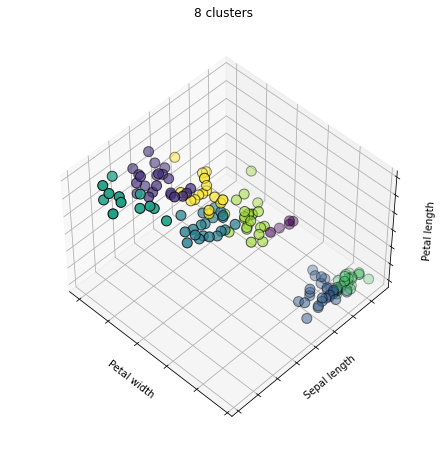

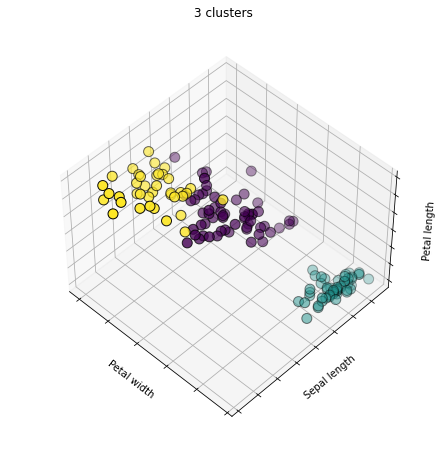

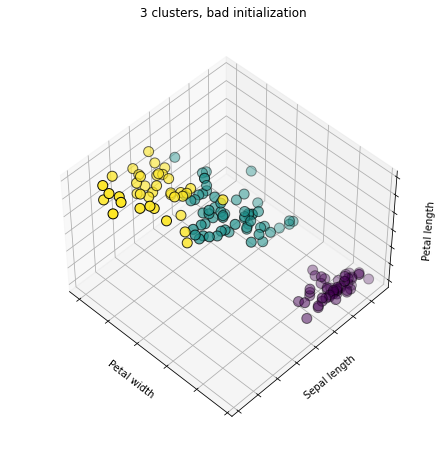

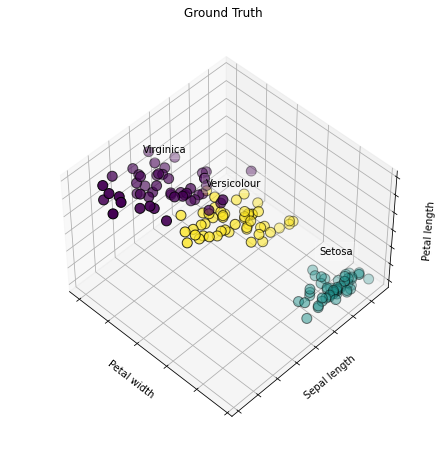

In [7]:
X, y = load_iris(return_X_y=True)

#Split and view data
X_train, X_test, Y_train, Y_test = train_test_split(X, y)


estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]


def addLabels():
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k', s=100)

    addLabels()
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k', s=100)

addLabels()
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

## Plot Means & Random Point

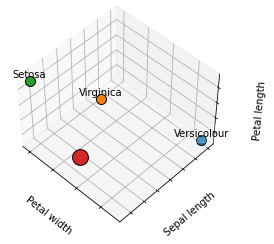

In [8]:
randPoint = [random.randint(0, 2500)/1000, random.randint(5000, 7000)/1000, random.randint(1000, 6000)/1000]

fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
means = []
for name, label in [('Setosa', 0),('Versicolour', 1),('Virginica', 2)]:
    means.append([X[Y == label, 3].mean(), X[Y == label, 0].mean(),X[Y == label, 2].mean()])
    ax.scatter(*means[-1],edgecolor='k', s=100)
    ax.text3D(X[y == label, 3].mean(),X[y == label, 0].mean(),
              X[y == label, 2].mean()+0.25, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
ax.scatter(*randPoint, edgecolor='k', s=250)
addLabels()

In [ ]:
"""
1. Embed New Point into Qubits
2. Embed a Mean Point into Qubits
3. Classify New Point based on results

Hint 1: Multiple CSWAP's, 1 ancilla
Hint 2: Which result represents closeness?
"""

n_qubits = 7 #can be more or less
dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev)
def SwapTest(params):
    #Quantum Embedding
    pass
    return qml.expval(qml.PauliZ(0))
results = []
classes = ['Setosa','Versicolour','Virginica']
for i in range(len(means)):
    params = [means[i], randPoint]
    results.append(SwapTest(params))

#Print Data
locus = 0#results.index(max(results))


"""
 -Answer Below (NO CHEATING!)- 
"""

In [9]:
"""
1. Embed New Point into Qubits
2. Embed a Mean Point into Qubits
3. Classify New Point based on results

Hint 1: Multiple CSWAP's
Hint 2: Which result represents closeness?
"""
n_qubits = 7
dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev)
def SwapTest(params):
    qml.Hadamard(wires=0)
    AngleEmbedding(params[0], wires=[1, 2, 3])
    AngleEmbedding(params[1], wires=[4, 5, 6])
    qml.CSWAP(wires=[0, 1, 4])
    qml.CSWAP(wires=[0, 2, 5])
    qml.CSWAP(wires=[0, 3, 6])
    qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))
results = []
classes = ['Setosa','Versicolour','Virginica']
for i in range(len(means)):
    params = [means[i], randPoint]
    results.append( SwapTest(params))

#Print Data
locus = results.index(max(results))
print("Random Point: " + str(randPoint))
for i in range(len(results)):
    print("Result " + str(i) + ": " + str(results[i]))
for i in range(len(means)):
    dist = sum((p-q)**2 for p, q in zip(means[i], randPoint)) ** .5
    print("Actual Distance: " + str(i) + ": " + str(dist) + " | " + str(means[i]))
print("This point is classified in class " + str(locus) + " which corresponds to " + classes[locus])



Random Point: [1.205, 6.458, 2.103]
Result 0: 0.39653788842197213
Result 1: 0.20776072358404318
Result 2: 0.019623378733563124
Actual Distance: 0: 1.8544179679888781 | [0.24599999999999997, 5.006, 1.4620000000000002]
Actual Distance: 1: 2.222560235404206 | [1.3259999999999998, 5.936, 4.26]
Actual Distance: 2: 3.547751682403942 | [2.0260000000000002, 6.587999999999998, 5.5520000000000005]
This point is classified in class 0 which corresponds to Setosa
